Group:
  - Ali Janloo
  - Ali Alavizadeh
  - Amir Ali Akhgari

## Tabu Search Algorithm in Nonlinear Optimization

### Introduction
Tabu Search is a metaheuristic search method employing local search techniques used for mathematical optimization. It guides a local heuristic search procedure to explore the solution space beyond local optimality by using memory structures. The algorithm maintains a list of previously visited solutions, called the tabu list, to avoid cycling back to them. This mechanism helps in exploring new areas of the solution space and escaping local optima.

### Key Components of Tabu Search
1. **Initial Solution**: The algorithm starts with an initial solution, which can be generated randomly or using a heuristic.
2. **Neighborhood Search**: From the current solution, the algorithm explores its neighborhood to find new potential solutions.
3. **Tabu List**: A memory structure that keeps track of recent solutions or moves to prevent revisiting them. This list can have a fixed size, after which the oldest entry is removed (FIFO).
4. **Aspiration Criteria**: Allows the algorithm to override the tabu status if a solution meets certain conditions, typically if it yields a better objective value than any previously found solution.
5. **Stopping Criteria**: Conditions under which the algorithm terminates, such as a fixed number of iterations, a time limit, or convergence to a solution.

### Algorithm Steps
1. **Initialize**: Start with an initial solution $ x_0 $ and an empty tabu list.
2. **Iterate**:
    - Generate the neighborhood of the current solution.
    - Evaluate the objective function for all neighbors.
    - Select the best candidate that is not in the tabu list (or satisfies the aspiration criteria).
    - Update the tabu list.
    - Move to the new solution.
3. **Terminate**: Check stopping criteria; if met, end the algorithm; otherwise, repeat the iteration.

Best solution found:  [1.6 0. ]
Objective value:  1.999573603041505


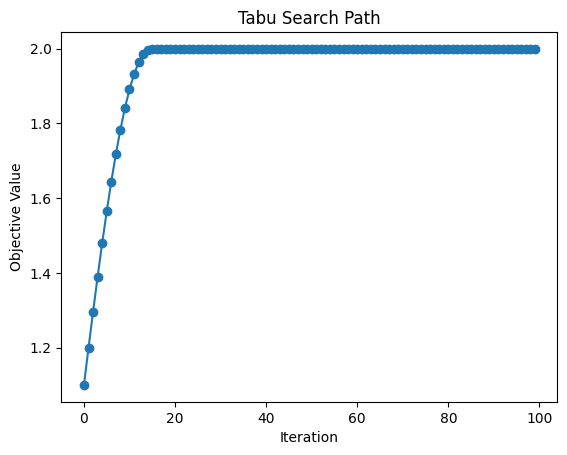

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def objective_function(x):
    return np.sin(x[0]) + np.cos(x[1])

# Generate neighborhood solutions
def generate_neighborhood(x, step_size=0.1):
    neighbors = []
    for i in range(len(x)):
        for delta in [-step_size, step_size]:
            neighbor = np.copy(x)
            neighbor[i] += delta
            neighbors.append(neighbor)
    return neighbors

# Select the best candidate from the neighborhood
def select_best_candidate(neighbors, tabu_list, best_solution):
    best_candidate = None
    best_value = float('-inf')
    for candidate in neighbors:
        if list(candidate) not in tabu_list:
            candidate_value = objective_function(candidate)
            if candidate_value > best_value:
                best_candidate = candidate
                best_value = candidate_value
    return best_candidate

# Tabu Search algorithm
def tabu_search(initial_solution, tabu_list_size, max_iterations):
    x_current = np.array(initial_solution)
    tabu_list = []
    best_solution = np.copy(x_current)

    history = []

    for _ in range(max_iterations):
        neighborhood = generate_neighborhood(x_current)
        x_next = select_best_candidate(neighborhood, tabu_list, best_solution)

        if objective_function(x_next) > objective_function(best_solution):
            best_solution = np.copy(x_next)

        tabu_list.append(list(x_next))
        if len(tabu_list) > tabu_list_size:
            tabu_list.pop(0)

        x_current = np.copy(x_next)
        history.append(objective_function(best_solution))

    return best_solution, history

# Parameters
initial_solution = [0.0, 0.0]
tabu_list_size = 5
max_iterations = 100

# Run Tabu Search
best_solution, history = tabu_search(initial_solution, tabu_list_size, max_iterations)

# Print the best solution
print("Best solution found: ", best_solution)
print("Objective value: ", objective_function(best_solution))

# Visualization
history = np.array(history)
plt.plot([i for i in list(range(max_iterations))], history, marker='o')
plt.title("Tabu Search Path")
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.show()


# Momentum vs. AdaDelta vs. Adam vs. Tabu Search

In [3]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y_true, params):
    y_pred = np.dot(X, params)
    error = y_pred - y_true
    grads = 2 * np.dot(X.T, error) / len(y_true)
    return grads


In [4]:
class MomentumOptimizer:
    def __init__(self, params, lr=0.001, momentum=0.9):
        self.params = params
        self.lr = lr
        self.momentum = momentum
        self.velocity = [np.zeros_like(p) for p in params]

    def step(self, grads):
        updated_params = []
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            self.velocity[i] = self.momentum * self.velocity[i] - self.lr * grad
            updated_params.append(param + self.velocity[i])
        self.params = updated_params


In [5]:
class AdadeltaOptimizer:
    def __init__(self, params, lr=1.0, rho=0.95, epsilon=1e-6):
        self.params = params
        self.lr = lr
        self.rho = rho
        self.epsilon = epsilon
        self.E_g2 = [np.zeros_like(param) for param in params]
        self.E_dx2 = [np.zeros_like(param) for param in params]

    def step(self, grads):
        updates = []
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            self.E_g2[i] = self.rho * self.E_g2[i] + (1 - self.rho) * grad**2
            rms_dx = np.sqrt(self.E_dx2[i] + self.epsilon)
            rms_g = np.sqrt(self.E_g2[i] + self.epsilon)
            delta_x = - (rms_dx / rms_g) * grad
            self.E_dx2[i] = self.rho * self.E_dx2[i] + (1 - self.rho) * delta_x**2
            param += delta_x
            updates.append(param)
        self.params = updates


In [6]:
class AdamOptimizer:
    def __init__(self, params, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.params = params
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = [np.zeros_like(p) for p in params]
        self.v = [np.zeros_like(p) for p in params]
        self.t = 0

    def step(self, grads):
        self.t += 1
        updated_params = []
        for i, (param, grad) in enumerate(zip(self.params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2)
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            param_update = self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            updated_params.append(param - param_update)
        self.params = updated_params


In [7]:
class TabuSearchOptimizer:
    def __init__(self, params, tabu_size=5, max_iterations=100, neighborhood_size=10):
        self.params = params
        self.tabu_size = tabu_size
        self.max_iterations = max_iterations
        self.neighborhood_size = neighborhood_size
        self.tabu_list = []
        self.best_params = np.copy(params)
        self.best_loss = float('inf')

    def _get_neighborhood(self, params):
        neighborhood = []
        for _ in range(self.neighborhood_size):
            neighbor = np.copy(params)
            idx = np.random.randint(len(params))
            perturbation = np.random.randn() * 0.01  # Small random change
            neighbor[idx] += perturbation
            neighborhood.append(neighbor)
        return neighborhood

    def _is_tabu(self, params):
        for tabu_params in self.tabu_list:
            if np.array_equal(tabu_params, params):
                return True
        return False

    def step(self, X, y_true):
        neighborhood = self._get_neighborhood(self.params)
        best_candidate = None
        best_candidate_loss = float('inf')

        for candidate in neighborhood:
            if not self._is_tabu(candidate):
                y_pred = np.dot(X, candidate)
                candidate_loss = mean_squared_error(y_true, y_pred)
                if candidate_loss < best_candidate_loss:
                    best_candidate = candidate
                    best_candidate_loss = candidate_loss

        if best_candidate is not None:
            self.params = best_candidate
            self.tabu_list.append(best_candidate)
            if len(self.tabu_list) > self.tabu_size:
                self.tabu_list.pop(0)

            if best_candidate_loss < self.best_loss:
                self.best_loss = best_candidate_loss
                self.best_params = best_candidate

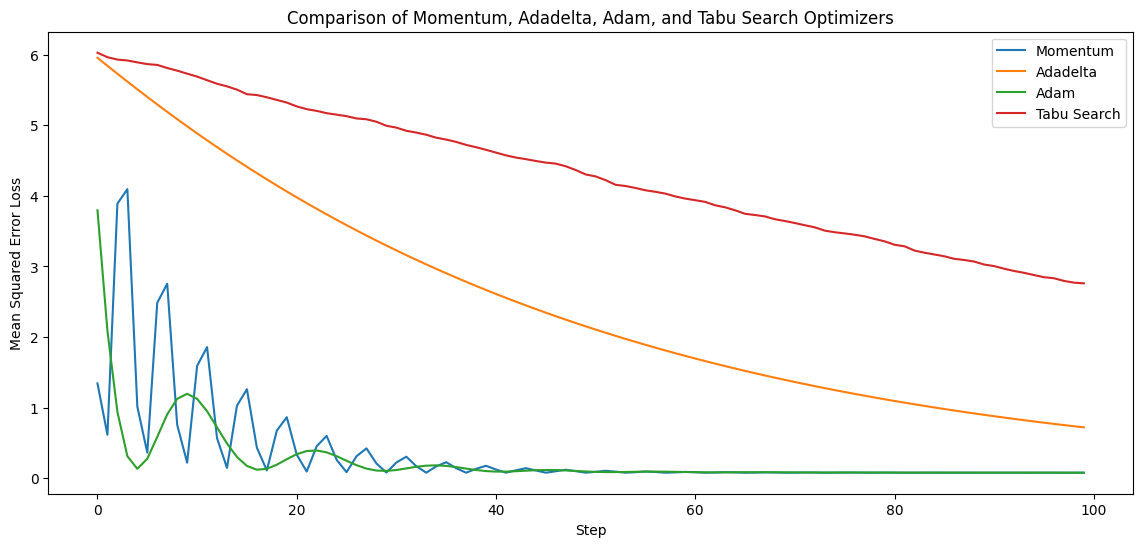

In [8]:
# Initialize data and parameters
np.random.seed(43)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y_true = np.random.rand(100)  # 100 true values
initial_params = np.random.rand(10)

# Optimizers
momentum_optimizer = MomentumOptimizer(np.copy(initial_params), lr=0.1, momentum=0.9)
adadelta_optimizer = AdadeltaOptimizer(np.copy(initial_params), lr=1.0)
adam_optimizer = AdamOptimizer(np.copy(initial_params), lr=0.1)
tabu_search_optimizer = TabuSearchOptimizer(np.copy(initial_params), tabu_size=5, max_iterations=100, neighborhood_size=10)

# Store losses for each optimizer
losses_momentum = []
losses_adadelta = []
losses_adam = []
losses_tabu_search = []

# Number of steps for optimization
steps = 100

for step in range(steps):
    # Momentum
    grads = compute_gradients(X, y_true, momentum_optimizer.params)
    momentum_optimizer.step(grads)
    y_pred = np.dot(X, momentum_optimizer.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses_momentum.append(current_loss)

    # Adadelta
    grads = compute_gradients(X, y_true, adadelta_optimizer.params)
    adadelta_optimizer.step(grads)
    y_pred = np.dot(X, adadelta_optimizer.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses_adadelta.append(current_loss)

    # Adam
    grads = compute_gradients(X, y_true, adam_optimizer.params)
    adam_optimizer.step(grads)
    y_pred = np.dot(X, adam_optimizer.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses_adam.append(current_loss)

    # Tabu Search
    tabu_search_optimizer.step(X, y_true)
    y_pred = np.dot(X, tabu_search_optimizer.params)
    current_loss = mean_squared_error(y_true, y_pred)
    losses_tabu_search.append(current_loss)

# Plot the losses
plt.figure(figsize=(14, 6))
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_adadelta, label='Adadelta')
plt.plot(losses_adam, label='Adam')
plt.plot(losses_tabu_search, label='Tabu Search')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error Loss')
plt.title('Comparison of Momentum, Adadelta, Adam, and Tabu Search Optimizers')
plt.legend()
plt.show()